# Wednesday, November 19th, 2025

## Recap: 
On Monday, we continued discussing implementing Conway's [Game of Life](https://conwaylife.com/wiki/Conway%27s_Game_of_Life) in Python. First, let's recall some of the code that we developed. To start, we import NumPy, PyPlot, the `FuncAnimation` function, and we set PyPlot to run in an interactive mode.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib tk

We defined the `get_padded_cells` function (which was based on the analagous function from our Image Denoising project), which placed rows of non-living cells above and below and columns of non-living cells to the left and right of our `cells` array. This function returns this new `padded_cells` array.

In [2]:
def get_padded_cells(cells, pad=1):
    num_rows, num_cols = cells.shape
    padded_cells = np.zeros((num_rows + 2*pad, num_cols + 2*pad), dtype=int)
    padded_cells[pad:-pad, pad:-pad] = cells
    return padded_cells

Next, we wrote a function `count_live_neighbors` that takes in the `padded_cells` array along with row/column indices `i`/`j`, and counts the number of live neighbors that the `[i,j]`th cell has.

In [3]:
def count_live_neighbors(padded_cells, i, j):
    neighbors = padded_cells[i:i+3, j:j+3]
    live_neighbors = np.sum(neighbors) - neighbors[1,1]
    return live_neighbors

We also defined a function `update_cells` that takes in an array, `cells`, which stores a configuration of live/dead cells, and returns the next configuration after applying the rules of the Game of Life.

In [4]:
def update_cells(cells):
    num_rows, num_cols = cells.shape
    updated_cells = cells.copy()
    padded_cells = get_padded_cells(cells)
    for row in range(num_rows):
        for col in range(num_cols):
            live_neighbors = count_live_neighbors(padded_cells, row, col)
            # If a live cell has exactly two or three living neighbors, it stays alive
            if cells[row, col] == 1 and (live_neighbors == 2 or live_neighbors == 3):
                updated_cells[row, col] = 1
            # If a dead cell has exactly three living neighbors, it becomes alive
            elif cells[row, col] == 0 and live_neighbors == 3:
                updated_cells[row, col] = 1
            # All other cells are dead
            else:
                updated_cells[row, col] = 0

    return updated_cells

To experiment, we defined a function `random_starting_state` that generates a random initial configuration of live/dead cells.

In [5]:
def random_starting_state(n=50, percent_live_cells=.1):
    cells = np.zeros((n,n), dtype=int)
    live_cell_mask = np.random.random((n,n)) < percent_live_cells
    cells[live_cell_mask] = 1
    return cells

We also defined a function `animage_game_of_life` that takes in an initial configuration of cells and produces an animation depicting the evolution of the cell configuration as the rules of the Game of Life are repeatedly applied.

In [6]:
def animate_game_of_life(cells):                                 
    fig = plt.figure()
    im = plt.imshow(cells,vmin=0,vmax=1)               # Generate the initial plot
    
    def animate(i):
        cells[:,:] = update_cells(cells)               # Update the cells array with random data
        im.set_data(cells)                             # Update the figure with new x array
        return im
    
    anim = FuncAnimation(fig, animate, cache_frame_data=False)
    plt.show()
    return anim

Let's see this animation in action:

In [7]:
cells = random_starting_state(100, .3)

anim = animate_game_of_life(cells)

## Analyzing the dynamics of the Game of Life

As previously discussed, in order to study the Game of Life and make meaningful qualitative and quantitative statements, it's useful to maintain a history of all configurations for a given simulation. Let's create a function that simulates the Game of Life with a given initial configuration for a given number of time steps and returns an array containing the entire history of configurations.

In [8]:
def simulate_game_of_life(cells, T):
    n,m = cells.shape
    cells_history = np.zeros((n, m, T+1), dtype=int)
    cells_history[:,:,0] = cells
    
    for t in range(T):
        cells_history[:,:,t+1] = update_cells(cells_history[:,:,t])

    return cells_history

Let's test this out using a random initial configuration of cells in a `100` by `100` grid, with around $30%$ of the cells initial set as living.

In [13]:
n = 100
percent_live_cells = .3
T = 100

cells = random_starting_state(n, percent_live_cells)
cells_history = simulate_game_of_life(cells, T)

As discussed, it is useful if we could condense the geometric information (i.e. the information in the first two dimensions of `cells_history` into a single number so that we could plot this quantity against time (i.e. against the third dimension).

One idea we looked at was to count the number of live cells during each time step.

In [14]:
number_of_live_cells_history = []

for t in range(T+1):
    number_of_live_cells = np.sum(cells_history[:,:,t] == 1)
    number_of_live_cells_history.append(number_of_live_cells)

Alternatively, we could use NumPy to calculate the number of cells per time step:

In [ ]:
number_of_live_cells_history = np.sum(cells_history, axis = [0,1])

For now, let's switch back to inline plotting since we will be working with static (i.e. non-animated) plots.

In [15]:
%matplotlib inline

Now let's plot the evolution of the number of live cells.

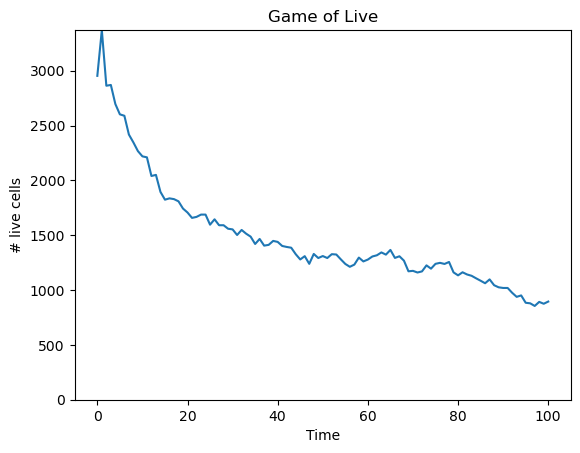

In [16]:
t_history = np.arange(T+1)
plt.plot(t_history, number_of_live_cells_history)

plt.title('Game of Live')
plt.xlabel('Time')
plt.ylabel('# live cells')

plt.ylim((0, max(number_of_live_cells_history)))
plt.show()

## Follow-up analysis of the number of live cells

There are many things we can do to continue studying how the number of live cells changes during the Game of Life. Here are just a few ideas.

**Exercise:** For a given choice of parameters `n` (the square grid size), `percent_live_cells` (the portion of randomly selected cells that will be initially set to living), and `T` (number of time steps to simulate), simulate the Game of Life many times. Plot the number of live cells as a function of time along with the average the number of live cells between these numerous simulations in a single plot.

In [17]:
n = 100
percent_live_cells = .3
T = 100

number_of_simulations = 10

cells_history_list = []
for i in range(number_of_simulations):
    cells = random_starting_state(n, percent_live_cells)
    cells_history = simulate_game_of_life(cells, T)
    cells_history_list.append(cells_history)

In [20]:
number_of_live_cells_history_list = []
for cells_history in cells_history_list:
    number_of_live_cells_history = np.sum(cells_history, axis = (0,1))
    number_of_live_cells_history_list.append(number_of_live_cells_history)

In [26]:
cells_history_array = np.array(cells_history_list, dtype=int)
number_of_live_cells_history_array = np.array(number_of_live_cells_history_list)

print(cells_history_array.shape)
print(number_of_live_cells_history_array.shape)

(10, 100, 100, 101)
(10, 101)


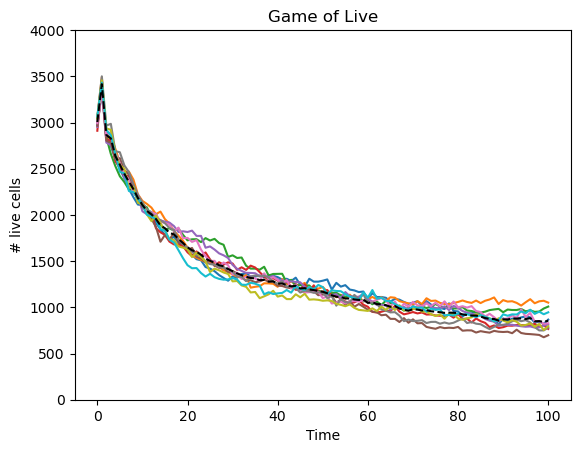

In [27]:
t_history = np.arange(T+1)
for number_of_live_cells_history in number_of_live_cells_history_list:
    plt.plot(t_history, number_of_live_cells_history)

number_of_live_cells_history_average = np.mean(number_of_live_cells_history_array, axis=0)
plt.plot(t_history, number_of_live_cells_history_average, 'k--')

plt.title('Game of Live')
plt.xlabel('Time')
plt.ylabel('# live cells')

#plt.ylim((0, max(number_of_live_cells_history)))
plt.ylim((0,4000))
plt.show()

In [31]:
np.mean(number_of_live_cells_history_average[-20:])

np.float64(878.85)

**Exercise:** For a given choice of parameters `n` and `T`, simulate the Game of Life with several different choices of `percent_live_cells` used to generate the random initial configuration. Plot the number of live cells as a function of time for these numerous simulations in a single plot.

**Exercise:** For a given choice of parameters `percent_live_cells` and `T`, simulate the Game of Life with several different choices of square grid size `n`. Instead of plotting the number of live cells as a function of time, normalize this count by the size of the grid (e.g. by dividing by `n**2`). Plot this normalized count for each of the simulations in a single plot.

**Exercise:** For a given choice of parameter `T`, simulate the Game of Life with several combinations of choices for `n` and `percent_live_cells`. For each simulation, calculate the average number of live cells from the last `10` times steps (choose `T > 10` at least). Create an array to store this data and use `plt.imshow` to visualize this array.